### Import necessarry libraries

In [1]:
#for data cleaning and preprocessing
import pandas as pd
import numpy as np
#using data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#using avoid unnecessary warning
import warnings
# Example: Ignore all warnings
warnings.filterwarnings('ignore')


### Load dataset

In [2]:
data = pd.read_csv("Indian_Kids_Screen_Time.csv")
data.sample(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
5694,15,Female,5.25,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
2831,13,Male,6.50,Smartphone,True,0.34,"Poor Sleep, Obesity Risk",Rural
2788,8,Male,5.37,TV,True,0.50,Poor Sleep,Urban
4207,8,Female,6.52,TV,True,0.47,NaN,Rural
1286,9,Female,4.59,Smartphone,True,0.60,NaN,Rural


### Basis summary stats

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
data.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


### Data cleaning 

In [5]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [6]:
data.Health_Impacts.tail()

9707                         Poor Sleep
9708                         Poor Sleep
9709    Poor Sleep, Eye Strain, Anxiety
9710                         Poor Sleep
9711                            Anxiety
Name: Health_Impacts, dtype: object

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.dropna(subset = "Health_Impacts",inplace = True)

In [9]:
data.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [10]:
#drop irrevelant columns2
data.drop(columns="Exceeded_Recommended_Limit",inplace=True)

### Data visualization

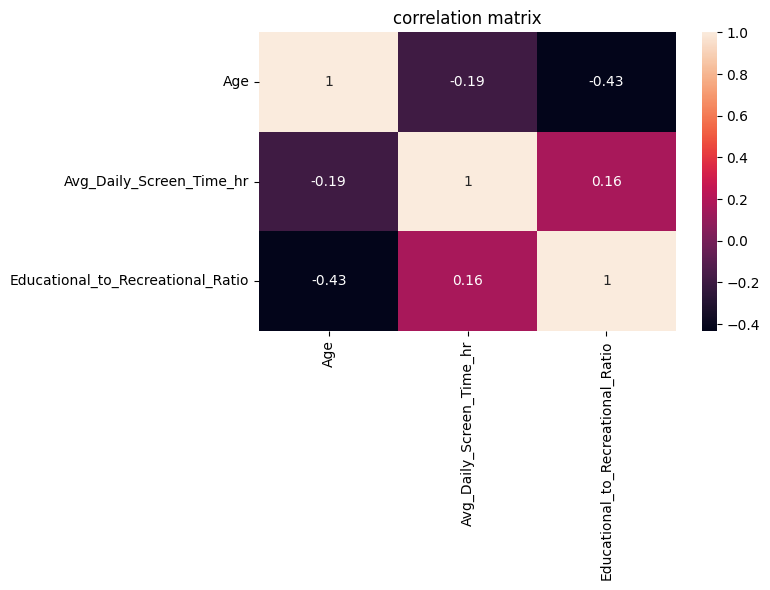

In [11]:
#correlation
data_corr = data.corr(numeric_only=True)
data_corr

#heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(data = data_corr,annot = True)
plt.title("correlation matrix")
plt.tight_layout()
plt.show()

#### Exploratory data analysis (EDA) 

In [ ]:
#Question for analysis
# 1.What is the distribution of daily screen time?
# 2.Which device is the most commonly used?
# 3.What is the average education-to-recreation ratio across age groups?
# 4.
# 5.


In [12]:
data.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,0.33,Anxiety,Urban


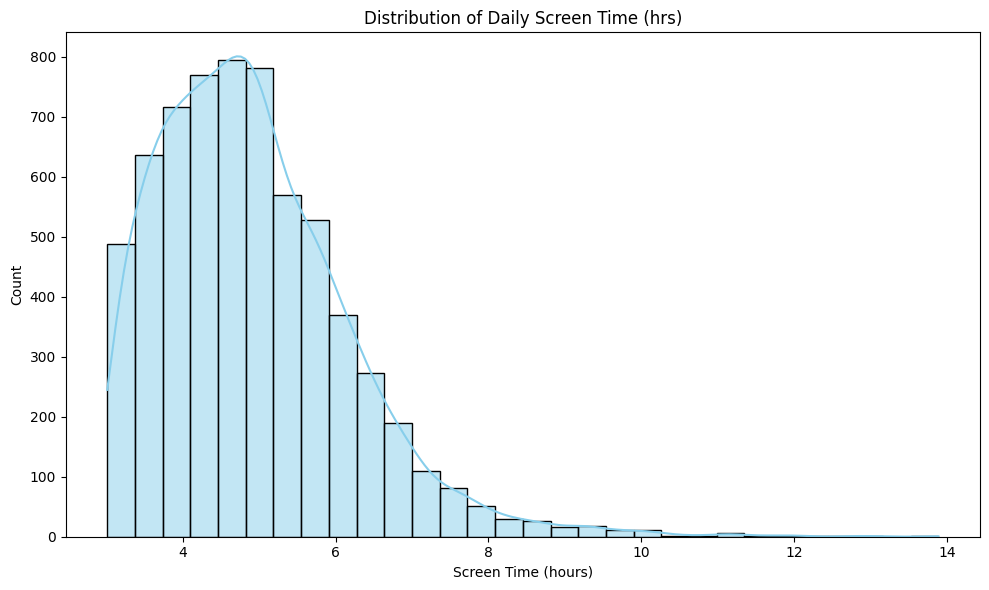

In [13]:
# What is the distribution of daily screen time?
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Daily_Screen_Time_hr'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Daily Screen Time (hrs)')
plt.xlabel('Screen Time (hours)')
plt.tight_layout()
plt.show()

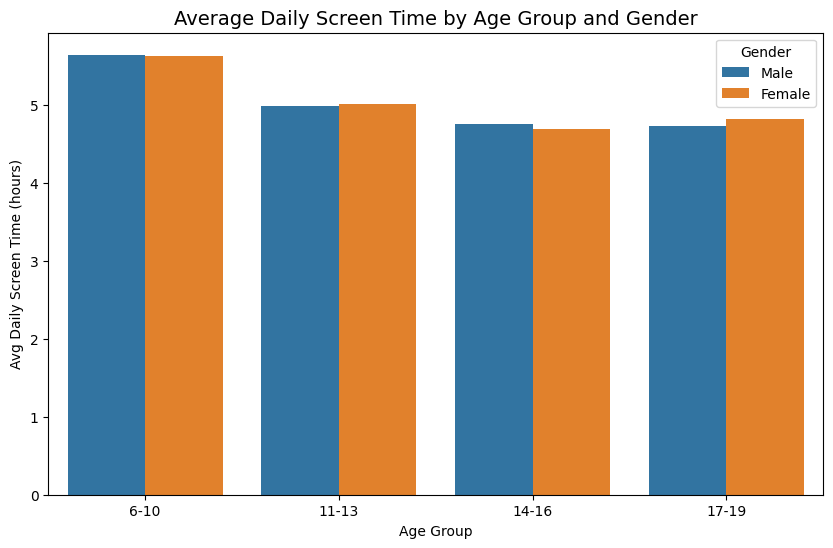

In [45]:
bins = [5,8,13,15,18]
lables = ['5-8','8-13','13-15','15-18']
data['Age_group'] = pd.cut(data['Age'],bins = bins,labels = labels,right = True)

plt.figure(figsize = (10,6))
sns.barplot(data = data,x='Age_group',y='Avg_Daily_Screen_Time_hr',hue='Gender',ci = None,color = None)
plt.title("Average Daily Screen Time by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Avg Daily Screen Time (hours)")
plt.show()


<Axes: title={'center': 'most commonly use devices'}, xlabel='counts', ylabel='Devices'>

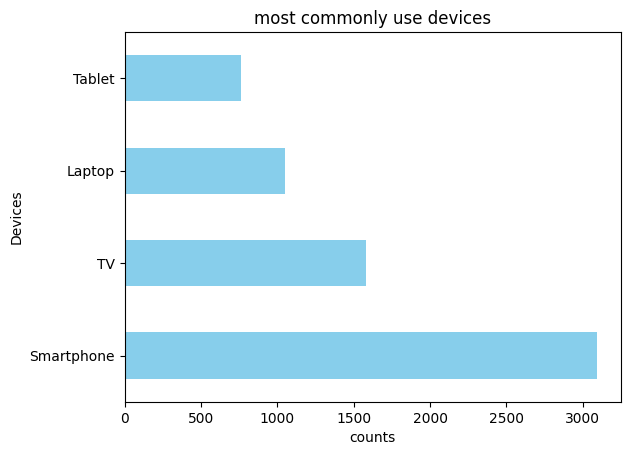

In [54]:
# Which device is the most commonly used?
data['Primary_Device'].value_counts().plot(kind = 'barh',ylabel = 'Devices',xlabel = 'counts',title = 'most commonly use devices',color = 'skyblue')

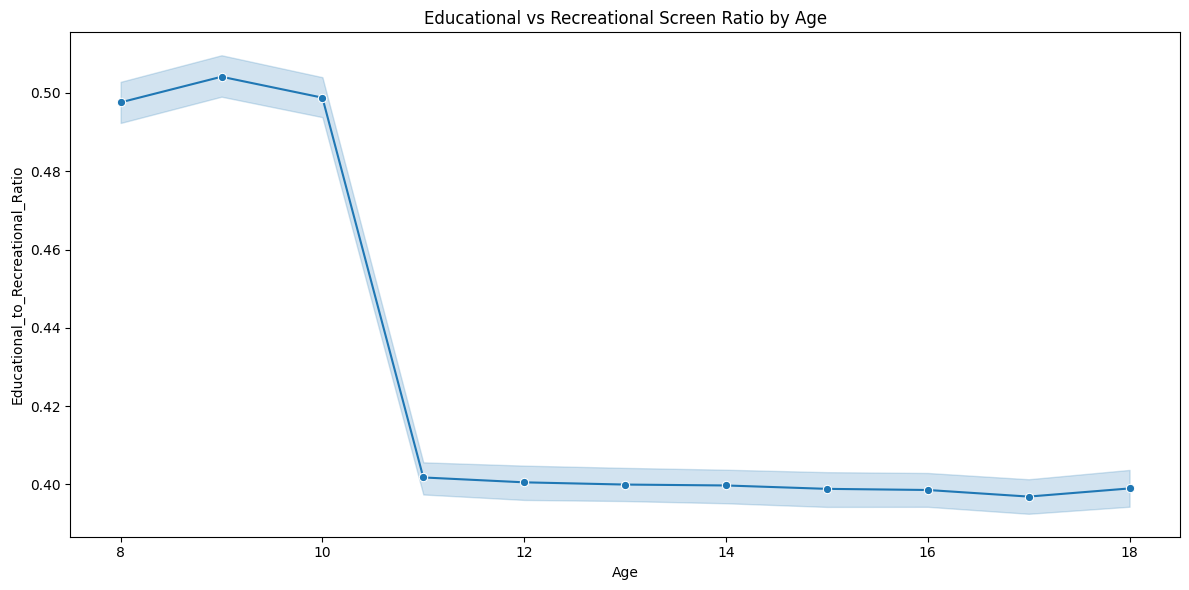

In [15]:
# What is the average education-to-recreation ratio across age groups?
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Educational_to_Recreational_Ratio', data=data, marker='o')
plt.title('Educational vs Recreational Screen Ratio by Age')
plt.tight_layout()
plt.show()


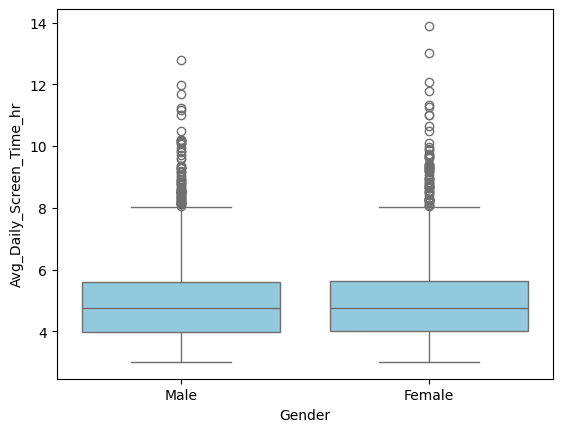

In [36]:
sns.boxplot(data = data ,x='Gender',y='Avg_Daily_Screen_Time_hr',color = 'skyblue')
plt.show()

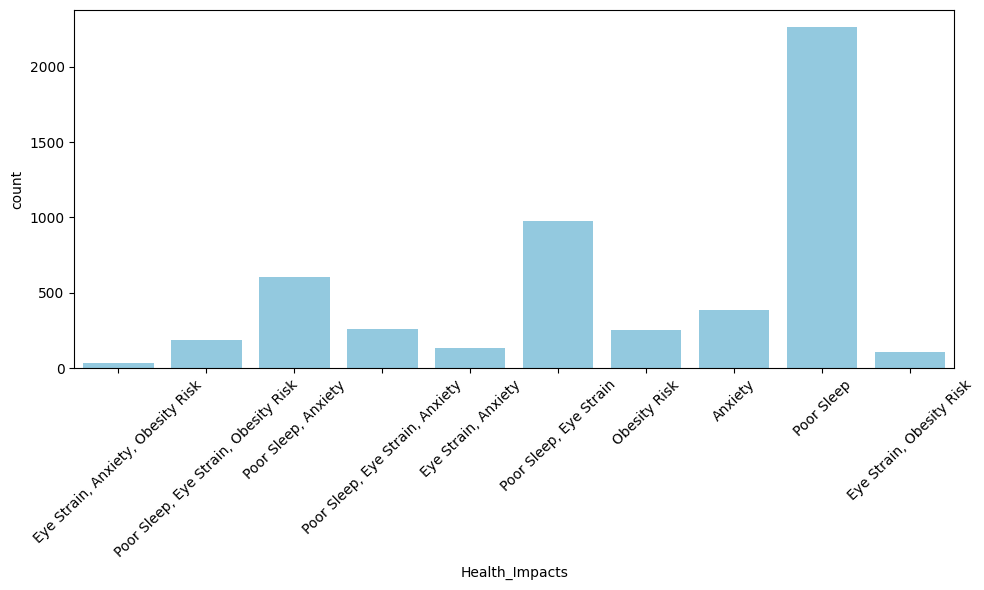

In [17]:
dt =data['Health_Impacts'].value_counts().sample(10)
plt.figure(figsize=(10, 6))
sns.barplot(data = dt,color = 'skyblue')
plt.xticks(rotation=44)
plt.tight_layout()
plt.show()

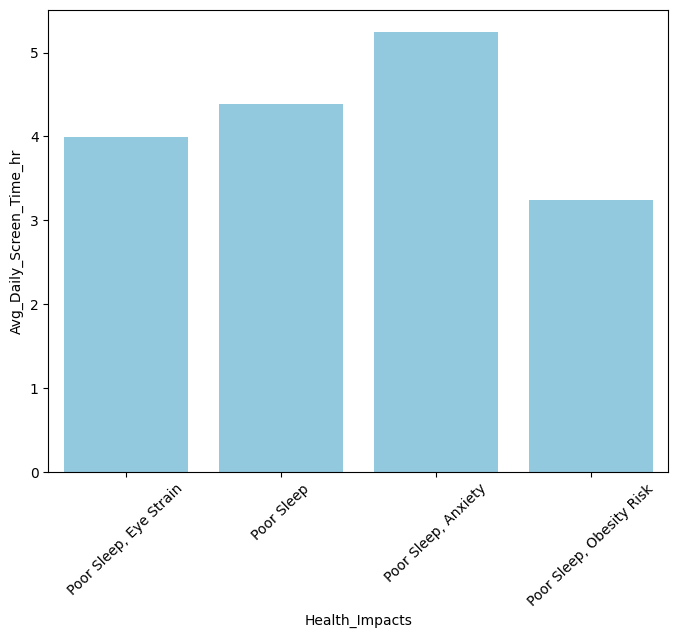

In [76]:
# Do health issues increase with higher daily screen hours?

plt.figure(figsize = (8,6))
sns.barplot(data=data.head(10),x='Health_Impacts',y='Avg_Daily_Screen_Time_hr',ci = None,color = 'skyblue')
plt.xticks(rotation = 44)
plt.show()

<Axes: xlabel='Urban_or_Rural'>

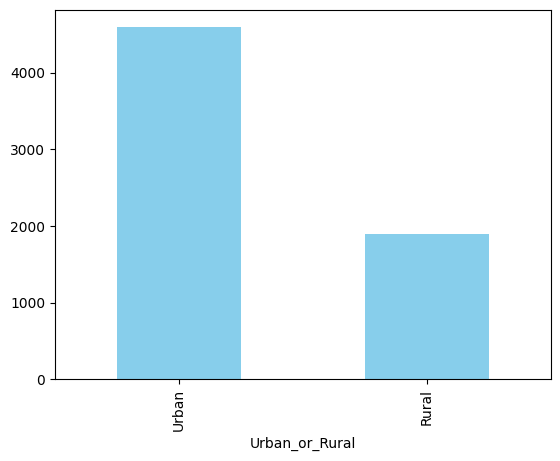

In [89]:
data['Urban_or_Rural'].value_counts().plot(kind = 'bar',color = 'skyblue')
